In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ppdf_w = np.load('ppdf_beam_width.npz')['ppdf widths']
print(ppdf_w.shape)

(24, 864, 15)


In [3]:
ppdf_w_nonzero = ppdf_w[ppdf_w != 0]
print(ppdf_w_nonzero.shape)
bin_edges = np.linspace(0, 13, 53)
bin_width = bin_edges[1] - bin_edges[0]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) * 0.5
# bin_centers = np.insert(bin_centers, 0, bin_centers[0] - bin_width)
# bin_centers = np.insert(bin_centers, -1, bin_centers[-1] + bin_width)
print(bin_width)
w_hist, _ = np.histogram(ppdf_w_nonzero, bins=bin_edges, density=True)
# w_hist = np.insert(w_hist, 0, 0)
# w_hist = np.insert(w_hist, -1, 0)
print(np.max(w_hist))


(83227,)
0.25
0.2405354881505156


In [4]:
plt.rcParams['font.size'] = 16

Text(0.02, 1, "Caption:The distribution of PPDFs' widths. The bin size is 0.25 mm. 6 panels per rotation, 24 rotaions are included. The PPDF width is calculated with interpolation.")

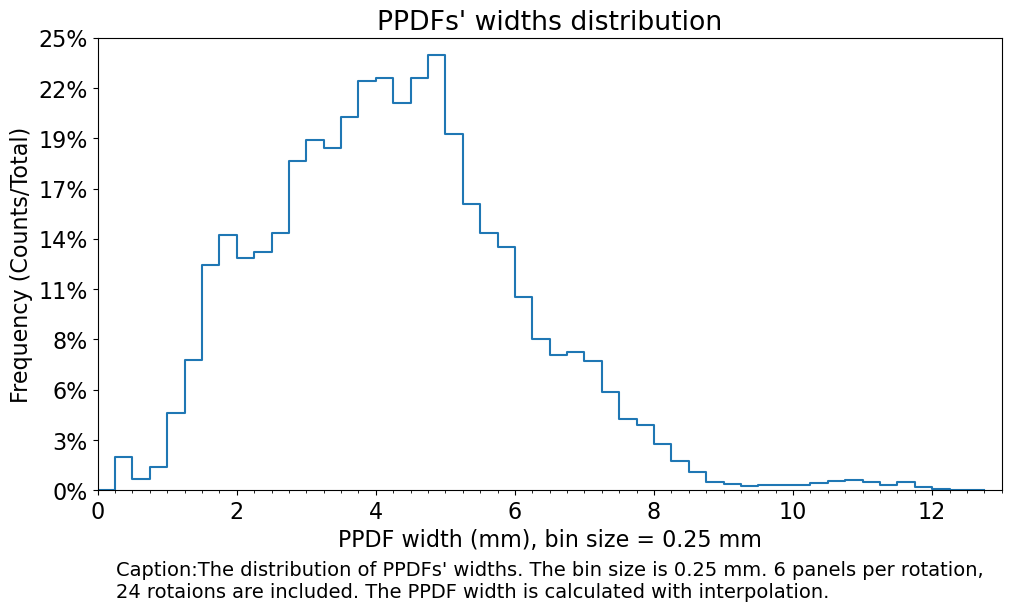

In [5]:
ppdf_w_nonzero = ppdf_w[ppdf_w != 0]
bin_edges = np.linspace(0, 13, 53)
bin_width = bin_edges[1] - bin_edges[0]
w_hist, _ = np.histogram(ppdf_w_nonzero, bins=bin_edges, density=True)
fig = plt.figure(figsize=(10, 6), layout="constrained")
gs0 = fig.add_gridspec(2, 1,height_ratios=[5.5, 0.5])
ax = fig.add_subplot(gs0[0, 0])
ax.step(bin_edges[:-1], w_hist)
ax.set_title("PPDFs' widths distribution")
ax.set_xlabel("PPDF width (mm), bin size = 0.25 mm")
ax.set_ylabel("Frequency (Counts/Total)")
ax.set_yticks(np.linspace(0, 0.25, 10))
ax.xaxis.set_minor_locator(plt.MultipleLocator(0.25))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.set_ybound(0, 0.25)
ax.set_xbound(0, 13)
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption_text = "The distribution of PPDFs' widths. The bin size is 0.25 mm. 6 panels per rotation, 24 rotaions are included. The PPDF width is calculated with interpolation."
ax_caption.text(0.02, 1, "Caption:" + caption_text, ha="left",va="top", fontsize=14,wrap=True)
# fig.get_layout_engine().set(hspace=0.0, wspace=0.0)
# plt.savefig("figures/24rots/ppdf_widths_all.png", dpi=300)

## Plot the sampling angle data with PPDF widths cuts

In [9]:
ppdf_sa = np.load('data/sampling_angles_rad_24rots.npz')['sampling angles']

ppdf_sa = ppdf_sa.reshape(24,-1,15)
print(ppdf_sa.shape)
print(ppdf_w.shape)
cut = (ppdf_w>0)
ppdf_sa_nonzero_w = ppdf_sa[cut]
print(ppdf_sa_nonzero_w.shape)
print(ppdf_w_nonzero.shape)

(24, 864, 15)
(24, 864, 15)
(83227,)
(83227,)


In [7]:
rad_bin_edges = np.linspace(-np.pi, np.pi, 361)
rad_bin_width = rad_bin_edges[1] - rad_bin_edges[0]
print(rad_bin_width*180/np.pi)
rad_hist, _ = np.histogram(ppdf_sa_nonzero_w, bins=rad_bin_edges, density=True)
print(np.max(rad_hist))
print(f"{np.count_nonzero(rad_hist)}/{rad_hist.size}")

0.9999999999999887
0.19512601681889968
360/360


83227/311040


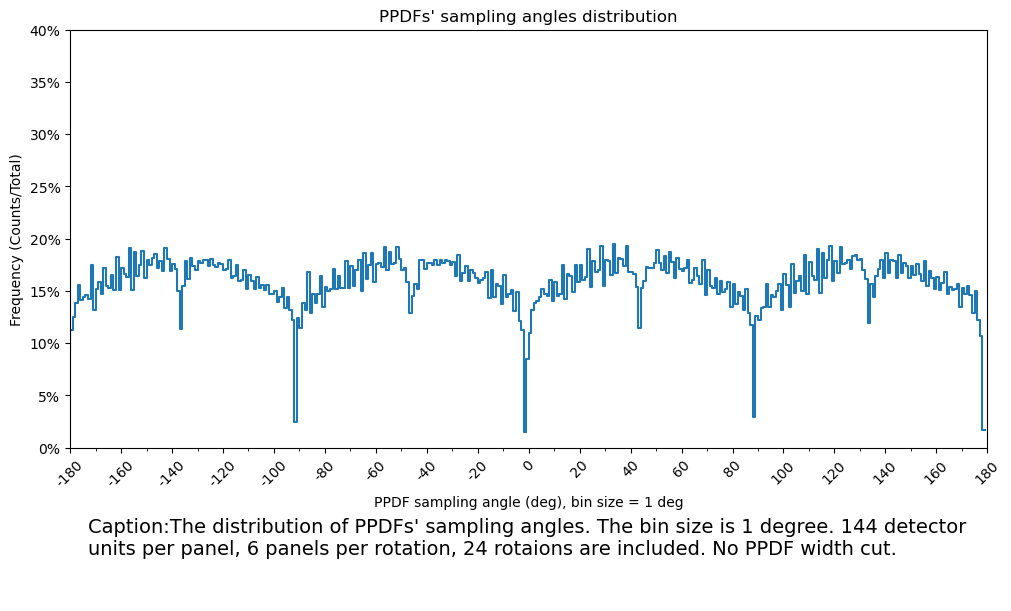

In [8]:
cut_upper_bound = np.inf
cut_lower_bound = 0
cut = (ppdf_w>cut_lower_bound)*(ppdf_w<cut_upper_bound)
print(f"{np.count_nonzero(cut)}/{cut.size}")
ppdf_sa_with_cut = ppdf_sa[cut]
hist_with_cut, _ = np.histogram(ppdf_sa_with_cut, bins=rad_bin_edges, density=True)
fig = plt.figure(figsize=(10, 6), layout="constrained")
gs0 = fig.add_gridspec(2, 1,height_ratios=[5, 1])
ax = fig.add_subplot(gs0[0, 0])
ax.step(rad_bin_edges[:-1]/np.pi*180, hist_with_cut)
ax.set_title("PPDFs' sampling angles distribution")
ax.set_xlabel("PPDF sampling angle (deg), bin size = 1 deg")
ax.set_ylabel("Frequency (Counts/Total)")
ax.set_yticks(np.linspace(0, 0.4, 9))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.set_xticks(np.linspace(-180, 180, 19))
ax.set_xticklabels(['{:.0f}'.format(y) for y in ax.get_xticks()], rotation=45)
ax.set_ybound(0, 0.4)
ax.set_xbound(-180, 180)
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption_text = "The distribution of PPDFs' sampling angles. The bin size is 1 degree. 144 detector units per panel, 6 panels per rotation, 24 rotaions are included. No PPDF width cut."
ax_caption.text(0.02, 1, "Caption:" + caption_text, ha="left",va="top", fontsize=14,wrap=True)
fig.get_layout_engine().set(hspace=0.0, wspace=0.0)
plt.savefig("figures/24rots/ppdf_sa_nocut.png", dpi=300)

27210/311040


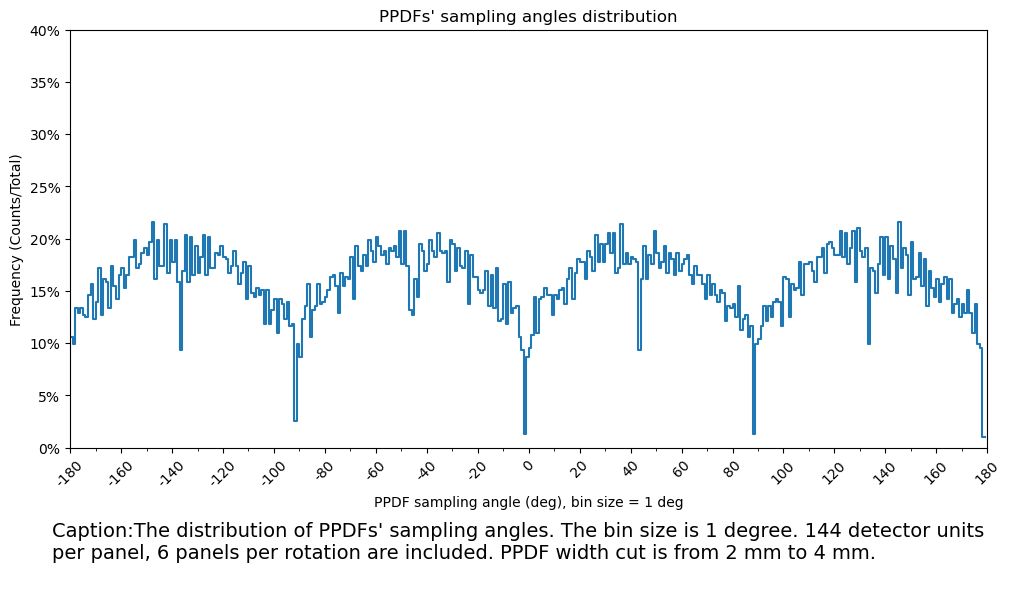

In [9]:
cut_upper_bound = 4
cut_lower_bound = 2
cut = (ppdf_w>=cut_lower_bound)*(ppdf_w<cut_upper_bound)
print(f"{np.count_nonzero(cut)}/{cut.size}")
ppdf_sa_with_cut = ppdf_sa[cut]
hist_with_cut, _ = np.histogram(ppdf_sa_with_cut, bins=rad_bin_edges, density=True)
fig = plt.figure(figsize=(10, 6), layout="constrained")
gs0 = fig.add_gridspec(2, 1,height_ratios=[5, 1])
ax = fig.add_subplot(gs0[0, 0])
ax.step(rad_bin_edges[:-1]/np.pi*180, hist_with_cut)
ax.set_title("PPDFs' sampling angles distribution")
ax.set_xlabel("PPDF sampling angle (deg), bin size = 1 deg")
ax.set_ylabel("Frequency (Counts/Total)")
ax.set_yticks(np.linspace(0, 0.4, 9))
ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
ax.set_yticklabels(['{:.0f}%'.format(y * 100) for y in ax.get_yticks()])
ax.set_xticks(np.linspace(-180, 180, 19))
ax.set_xticklabels(['{:.0f}'.format(y) for y in ax.get_xticks()], rotation=45)
ax.set_ybound(0, 0.4)
ax.set_xbound(-180, 180)
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption_text = f"The distribution of PPDFs' sampling angles. The bin size is 1 degree. 144 detector units per panel, 6 panels per rotation are included. PPDF width cut is from {cut_lower_bound} mm to {cut_upper_bound} mm."
ax_caption.text(-0.02, 0.95, "Caption:" + caption_text, ha="left",va="top", fontsize=14,wrap=True)
fig.get_layout_engine().set(hspace=0.0, wspace=0.0)
plt.savefig("figures/24rots/ppdf_sa_with_cut_2_4.png", dpi=300)

In [67]:
all_hist_with_cut = []
for i_deg in range(24):
    deg = i_deg * 15
    cut_upper_bound = 4
    cut_lower_bound = 2
    cut = (data[i_deg] > cut_lower_bound) * (data[i_deg] <= cut_upper_bound)
    ppdf_sa_with_cut = ppdf_sa[i_deg][cut]
    hist_with_cut, _ = np.histogram(ppdf_sa_with_cut, bins=rad_bin_edges)
    nonzero_bins = np.count_nonzero(hist_with_cut)
    print(f"{np.count_nonzero(cut)}/{cut.size}, {nonzero_bins}/{hist_with_cut.size}")
    fig = plt.figure(figsize=(10, 6), layout="constrained")
    gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
    ax = fig.add_subplot(gs0[0, 0])
    ax.step(rad_bin_edges[:-1] / np.pi * 180, hist_with_cut)
    ax.set_title(f"PPDFs' sampling angles distribution, scanner at {deg} deg")
    ax.set_xlabel("PPDF sampling angle (deg), bin size = 1 deg")
    # ax.set_ylabel("Frequency (Counts/Total)")
    ax.set_ylabel("Counts")
    ax.set_yticks(np.linspace(0, 30, 7))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
    # ax.set_yticklabels(["{:.0f}%".format(y * 100) for y in ax.get_yticks()])
    ax.set_xticks(np.linspace(-180, 180, 19))
    ax.set_xticklabels(["{:.0f}".format(y) for y in ax.get_xticks()], rotation=45)
    ax.set_ybound(0, 30)
    ax.set_xbound(-180, 180)
    ax_caption = fig.add_subplot(gs0[1, 0])
    ax_caption.axis("off")
    caption_text = (
        f"The distribution of PPDFs' sampling angles. The bin size is 1 degree. 144 detector units per panel, 6 panels per rotation, scanner at {deg} deg is included.\n"
        + f"PPDF width cut is from {cut_lower_bound} mm to {cut_upper_bound} mm.\n"
        + f"Total counts: {np.count_nonzero(cut)}/{cut.size}, non-zero bins: {nonzero_bins}/{hist_with_cut.size}"
    )
    ax_caption.text(
        -0.02,
        0.95,
        "Caption:" + caption_text,
        ha="left",
        va="top",
        fontsize=14,
        wrap=True,
    )
    fig.get_layout_engine().set(hspace=0.0, wspace=0.0)
    plt.savefig(
        f"figures/24rots/counts/{cut_lower_bound}_{cut_upper_bound}/sampling_deg_with_cut_{cut_lower_bound}_{cut_upper_bound}_at_{deg:02d}_deg.png",
        dpi=150,
    )
    plt.close(fig)
    all_hist_with_cut.append(hist_with_cut)
all_hist_with_cut = np.array(all_hist_with_cut)

1195/12960, 265/360
1213/12960, 276/360
1226/12960, 265/360
1217/12960, 281/360
1211/12960, 273/360
1204/12960, 280/360
1210/12960, 270/360
1201/12960, 271/360
1190/12960, 268/360
1204/12960, 274/360
1188/12960, 269/360
1205/12960, 281/360
1222/12960, 275/360
1230/12960, 270/360
1233/12960, 276/360
1230/12960, 277/360
1187/12960, 266/360
1218/12960, 277/360
1201/12960, 276/360
1229/12960, 280/360
1209/12960, 275/360
1190/12960, 277/360
1168/12960, 269/360
1187/12960, 274/360


## Sum of rotation, cut: 2-4

In [68]:
print(all_hist_with_cut.shape)

(24, 360)


In [71]:
for i_deg in range(24):
    deg = i_deg * 2.5
    cut_upper_bound = 4
    cut_lower_bound = 2

    ydata = all_hist_with_cut[:i_deg+1].sum(axis=0)
    # ymax = 360
    # ymax_div = ymax//10
    # yaxismax = ymax_div*10 + 10
    
    nonzero_bins = np.count_nonzero(ydata)
    print(f"{nonzero_bins}/{ydata.size}")
    fig = plt.figure(figsize=(10, 6), layout="constrained")
    gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
    ax = fig.add_subplot(gs0[0, 0])
    ax.step(rad_bin_edges[:-1] / np.pi * 180, ydata)
    ax.set_title(f"PPDFs' sampling angles distribution, scanner sum up to {deg} deg")
    ax.set_xlabel("PPDF sampling angle (deg), bin size = 1 deg")
    # ax.set_ylabel("Frequency (Counts/Total)")
    ax.set_ylabel("Counts")
    # ax.set_yticks(np.linspace(0, yaxismax, ymax_div+2))
    ax.set_yticks(np.arange(0, 131, 10))
    ax.xaxis.set_minor_locator(plt.MultipleLocator(10))
    # ax.set_yticklabels(["{:.0f}%".format(y * 100) for y in ax.get_yticks()])
    ax.set_xticks(np.linspace(-180, 180, 19))
    ax.set_xticklabels(["{:.0f}".format(y) for y in ax.get_xticks()], rotation=45)
    ax.set_ybound(0, 130)
    ax.set_xbound(-180, 180)
    ax_caption = fig.add_subplot(gs0[1, 0])
    ax_caption.axis("off")
    caption_text = (
        f"The distribution of PPDFs' sampling angles. Sum rotations up to a certain degrees.The bin size is 1 degree. 144 detector units per panel, 6 panels per rotation, scanner rotations up to {deg} deg is included.\n"
        + f"PPDF width cut is from {cut_lower_bound} mm to {cut_upper_bound} mm.\n"
        + f"Total counts: {np.sum(ydata)}/{12960*(i_deg+1)}, non-zero bins: {nonzero_bins}/{360}"
    )
    ax_caption.text(
        -0.02,
        0.95,
        "Caption:" + caption_text,
        ha="left",
        va="top",
        fontsize=14,
        wrap=True,
    )
    fig.get_layout_engine().set(hspace=0.0, wspace=0.0)
    plt.savefig(
        f"figures/24rots/counts/{cut_lower_bound}_{cut_upper_bound}/sum/{i_deg:02d}.png",
        dpi=150,
    )
    plt.close(fig)

265/360
335/360
357/360
357/360
358/360
359/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360
360/360


In [57]:
fit_params = np.load("data/system_matrix_01_slopes.npz")["fit params"]
filtered_ppdf = np.load("data/system_matrix_01_slopes.npz")["filtered ppdfs"]  
print(fit_params.shape)
slopes = fit_params[:, :, 0]
rs = fit_params[:, :, 2]
indices = np.abs(rs) > 0.5
print(np.count_nonzero(slopes[indices]))
print(np.count_nonzero(rs))
print(np.count_nonzero(slopes[rs != 0]))
print(np.count_nonzero(~np.isnan(slopes[rs != 0])))

(864, 15, 3)
3448
3463
3448
3463


In [58]:
print(np.where((rs != 0)*(slopes==0)))

(array([ 64,  66, 113, 119, 125, 131, 137, 143, 496, 545, 551, 557, 563,
       569, 575]), array([1, 1, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1]))


131 0 1.0 0.0


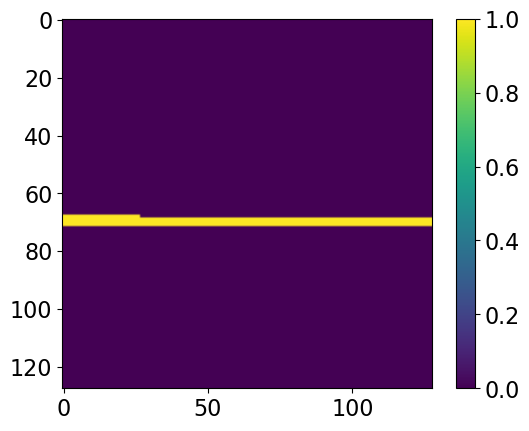

In [60]:
idd, idl = np.where((rs != 0) * (slopes == 0))
idx = 5
print(idd[idx], idl[idx], rs[idd[idx], idl[idx]], slopes[idd[idx], idl[idx]])
mask_data = filtered_ppdf[idd[idx]].reshape(128, 128)
img = np.zeros((128, 128))
img[mask_data == idl[idx] + 1] = 1
im = plt.imshow(img, cmap="viridis")
plt.colorbar(im)

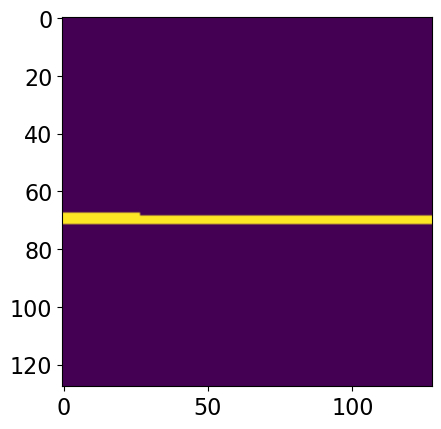

In [61]:
plt.imshow(filtered_ppdf[idd[idx]].reshape(128, 128), cmap="viridis")

## ASCI MAP

In [7]:
## coverage map
mask_maps = []
for i_deg in range(24):
    mask_maps.append(
        np.load("data/system_matrix_%02d_slopes.npz" % i_deg)["filtered ppdfs"]
    )
mask_maps = np.array(mask_maps)
print(f"{'Shape of mask map':32s}", mask_maps.shape)
print(f"{'Shape of ppdf_w':32s}", ppdf_w.shape)
print(f"{'Shape of ppdf_sa':32s}", ppdf_sa.shape)
out_dict = {
    "mask maps": mask_maps,
    "ppdf widths": ppdf_w,
    "ppdf sampling angles": ppdf_sa,
}


Shape of mask map                (24, 864, 128, 128)
Shape of ppdf_w                  (24, 864, 15)


NameError: name 'ppdf_sa' is not defined

In [18]:
np.savez_compressed("data/ascmap_data_24rots.npz", **out_dict)

In [27]:
# Angular Sampling Counts maps of the FOV
mask_maps_reshaped = mask_maps.reshape(24, -1, 128 * 128)
ascmap = []
cut_upper = 4
cut_lower = 2
cut = (ppdf_w > cut_lower) * (ppdf_w <= cut_upper)
print(f"{'Shape of cut':32s}", cut.shape)


Shape of cut                     (24, 864, 15)


In [28]:
for aid in range(24):
    sa_map = np.full((864, 128 * 128), np.nan)
    for vid in np.arange(128 * 128):
        indices = mask_maps_reshaped[aid, :, vid].astype(int) - 1
        for did in np.arange(864):
            if cut[aid, did, indices[did]]:
                sa_map[did, vid] = ppdf_sa[aid][did, indices[did]]
    ascmap.append(sa_map)
ascmap = np.array(ascmap)

In [29]:
np.savez_compressed("data/ascmap_24rots.npz", ascmap=ascmap)

In [30]:
print(f"{'Shape of ascmap':32s}", ascmap.shape)

Shape of ascmap                  (24, 864, 16384)


## Histogram the sampling angles of each voxel in the FOV

In [31]:
bin_edges = np.linspace(-np.pi, np.pi, 361)
bin_width = bin_edges[1] - bin_edges[0]

hist_data = np.zeros((24, 128 * 128, 360))
for vid in range(128 * 128):
    for aid in range(24):
        sa_data = ascmap[aid, :, vid]
        sa_data = sa_data[~np.isnan(sa_data)]
        if sa_data.size == 0:
            continue
        hist, _ = np.histogram(sa_data, bins=bin_edges)
        hist_data[aid, vid] = hist

In [32]:
hist_data_counts = np.count_nonzero(hist_data, axis=2)
print(f"{'Shape of hist_data_counts':32s}", hist_data_counts.shape)

Shape of hist_data_counts        (24, 16384)


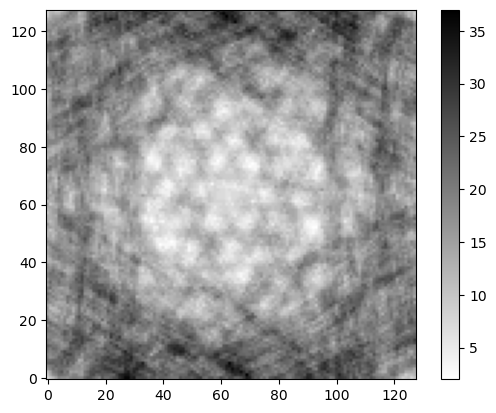

In [36]:
im = plt.imshow(hist_data_counts[0].reshape(128, 128),origin='lower', cmap="gray_r")
plt.colorbar(im)

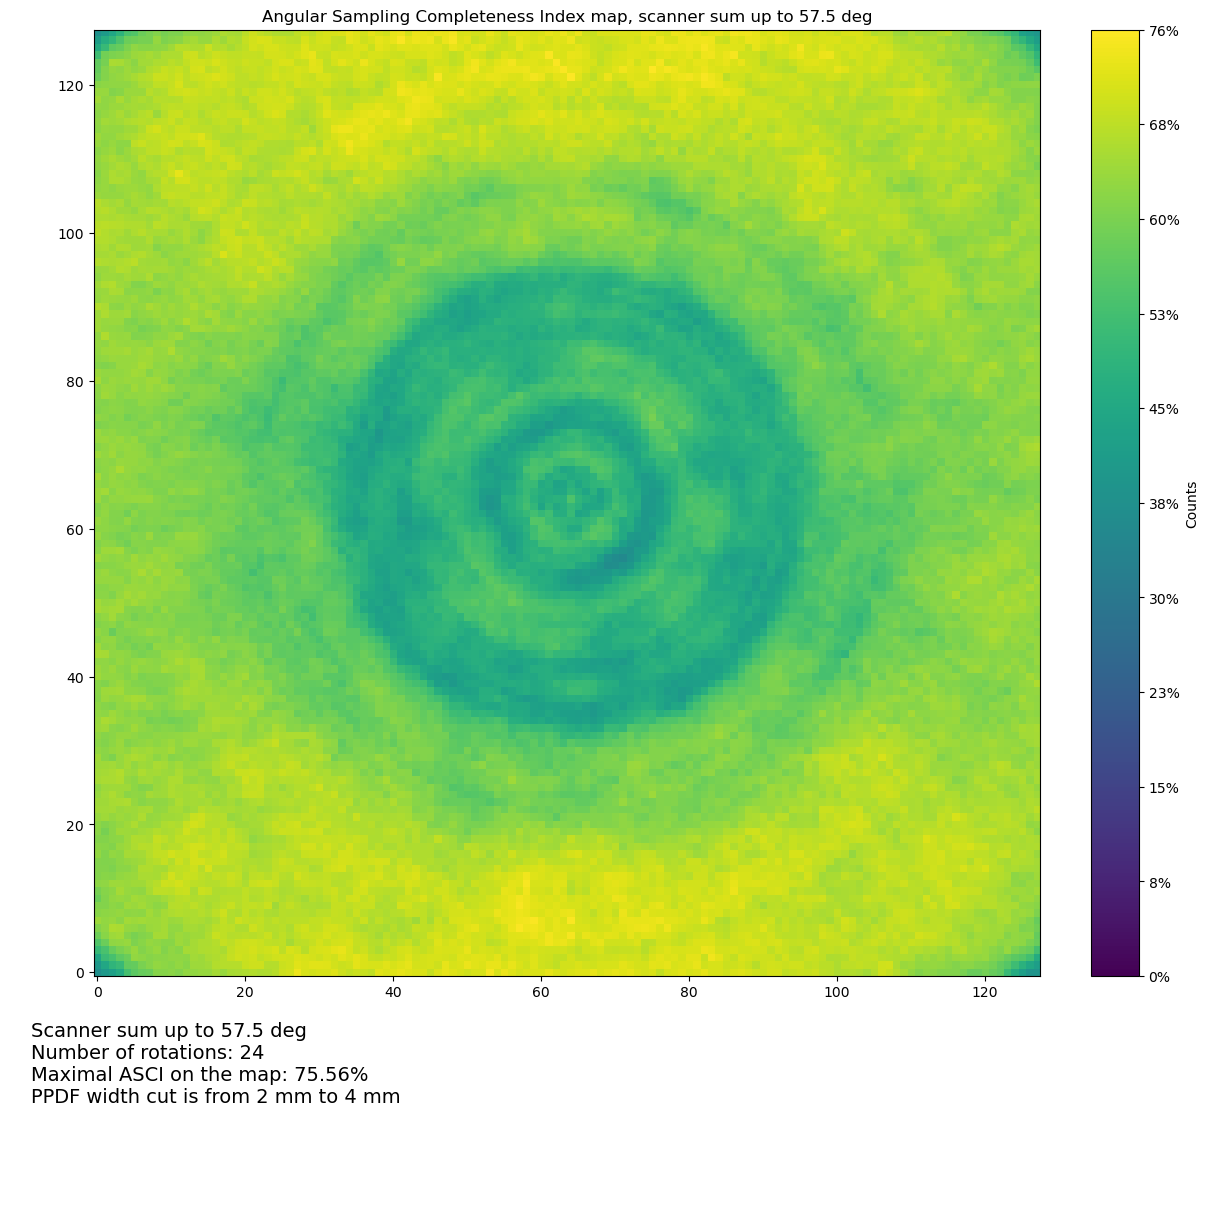

In [54]:
fig = plt.figure(figsize=(12, 12), layout="constrained")
gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
ax = fig.add_subplot(gs0[0, 0])
asci = np.count_nonzero(hist_data, axis=2)[0] / 360
norm = plt.Normalize(0, np.max(asci))
im = ax.imshow(asci.reshape(128, 128), origin="lower", norm=norm, cmap="viridis")
ax_title = ax.set_title(
    f"Angular Sampling Completeness Index map, scanner sum up to {0:2.1f} deg"
)
cbar = fig.colorbar(im, ax=ax, label="Counts")
cbar.set_ticks(np.linspace(0, np.max(asci), 11))
cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption = ax_caption.text(
    0.02,
    0.95,
    f"Scanner sum up to {0:2.1f} deg\nNumber of rotations: 1\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm",
    ha="left",
    va="top",
    fontsize=14,
    wrap=True,
)
plt.savefig(f"figures/24rots/asci_map/2-4/sum/{0:02d}.png", dpi=150)
for aid in range(1, 24):
    hist_data_counts = np.count_nonzero(np.sum(hist_data[: aid + 1], axis=0), axis=1)
    asci = hist_data_counts / 360
    im.set_data(asci.reshape(128, 128))
    im.set_norm(plt.Normalize(0, np.max(asci)))
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0, np.max(asci), 11))
    cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
    ax_title.set_text(
        f"Angular Sampling Completeness Index map, scanner sum up to {aid*2.5:2.1f} deg"
    )
    caption.set_text(
        f"Scanner sum up to {aid*2.5:2.1f} deg\nNumber of rotations: {aid+1}\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm"
    )
    plt.savefig(f"figures/24rots/asci_map/2-4/sum/{aid:02d}.png", dpi=150)

## Cut 0-4 mm

In [10]:
mask_maps = np.load("data/ascmap_data_24rots.npz")['mask maps']
mask_maps_reshaped = mask_maps.reshape(24, -1, 128 * 128)
ascmap = np.empty((24, 864, 128 * 128))
cut_upper = 4
cut_lower = 0
cut = (ppdf_w > cut_lower) * (ppdf_w <= cut_upper)
print(f"{'Shape of cut':32s}", cut.shape)
ppdf_sa_cutted = np.where(cut, ppdf_sa, np.nan)
print(f"{'Shape of ppdf_sa_cutted':32s}", ppdf_sa_cutted.shape)
for aid in range(24):
    for vid in np.arange(128 * 128):
        indices = mask_maps_reshaped[aid, :, vid].astype(int) - 1
        ascmap[aid, :, vid] = ppdf_sa_cutted[aid][np.arange(864), indices]

Shape of cut                     (24, 864, 15)
Shape of ppdf_sa_cutted          (24, 864, 15)


In [11]:
bin_edges = np.linspace(-np.pi, np.pi, 361)
bin_width = bin_edges[1] - bin_edges[0]
hist_data = np.zeros((24, 128 * 128, 360))
for vid in range(128 * 128):
    for aid in range(24):
        sa_data = ascmap[aid, :, vid]
        sa_data = sa_data[~np.isnan(sa_data)]
        if sa_data.size == 0:
            continue
        hist, _ = np.histogram(sa_data, bins=bin_edges)
        hist_data[aid, vid] = hist

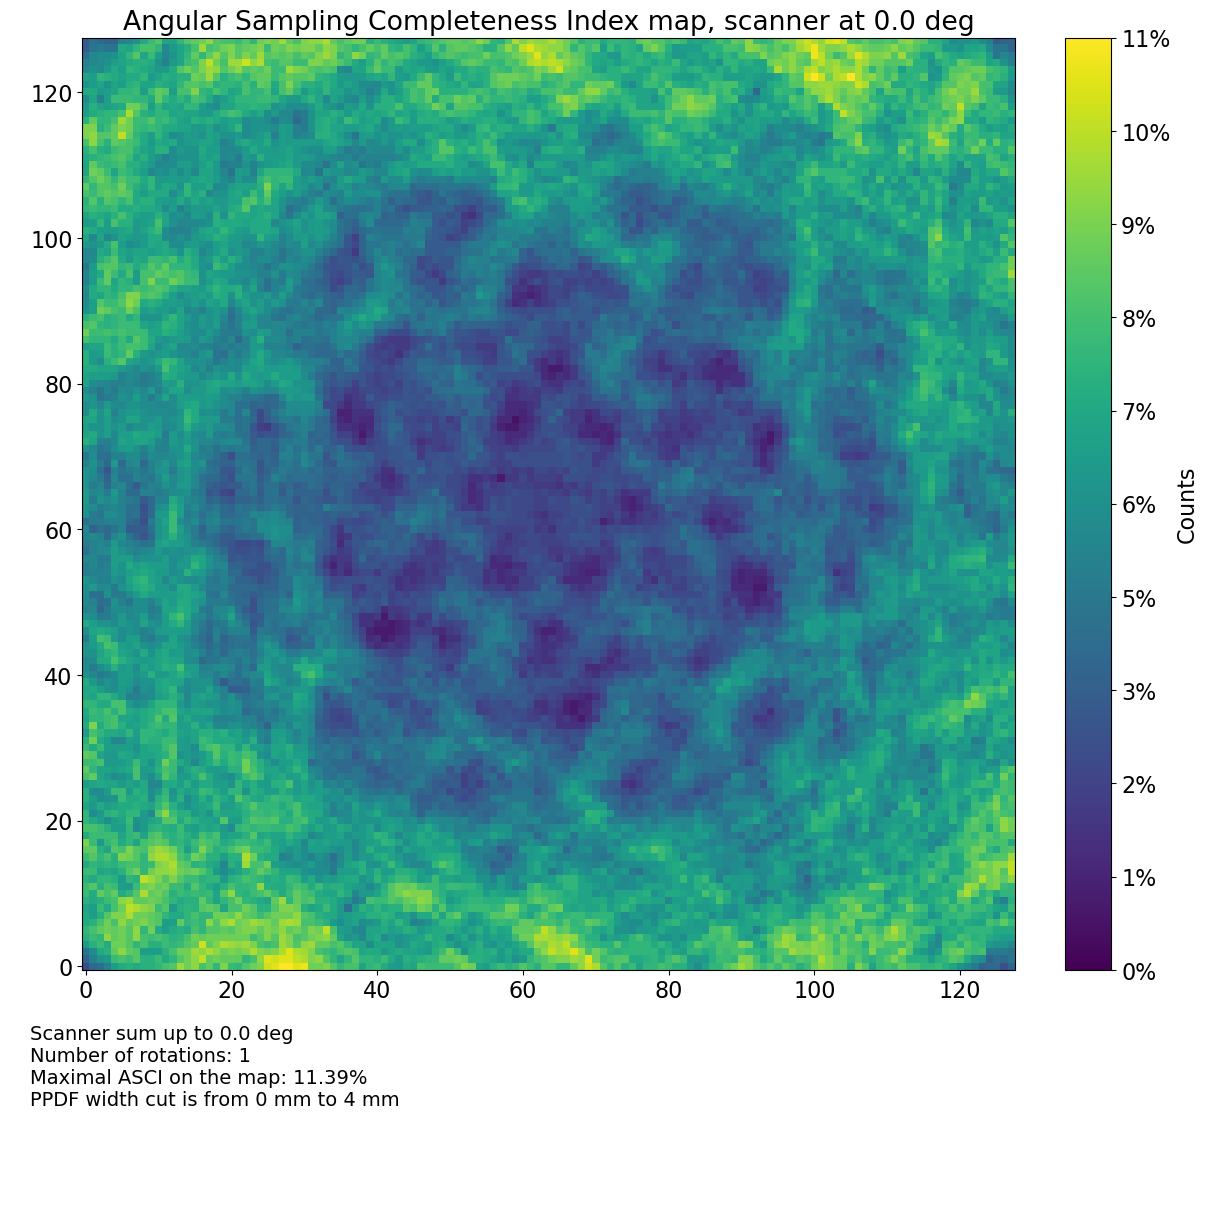

In [12]:
cut_upper = 4
cut_lower = 0
fig = plt.figure(figsize=(12, 12), layout="constrained")
gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
ax = fig.add_subplot(gs0[0, 0])
asci = np.count_nonzero(hist_data, axis=2)[0] / 360
norm = plt.Normalize(0, np.max(asci))
im = ax.imshow(asci.reshape(128, 128), origin="lower", norm=norm, cmap="viridis")
ax_title = ax.set_title(
    f"Angular Sampling Completeness Index map, scanner at {0:2.1f} deg"
)
cbar = fig.colorbar(im, ax=ax, label="Counts")
cbar.set_ticks(np.linspace(0, np.max(asci), 11))
cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption = ax_caption.text(
    0.02,
    0.95,
    f"Scanner sum up to {0:2.1f} deg\nNumber of rotations: 1\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm",
    ha="left",
    va="top",
    fontsize=14,
    wrap=True,
)
plt.savefig(f"figures/24rots/asci_map/0-4/sum/{0:02d}.png", dpi=150)
# for aid in range(1, 24):
#     hist_data_counts = np.count_nonzero(np.sum(hist_data[: aid + 1], axis=0), axis=1)
#     asci = hist_data_counts / 360
#     im.set_data(asci.reshape(128, 128))
#     im.set_norm(plt.Normalize(0, np.max(asci)))
#     cbar.update_normal(im)
#     cbar.set_ticks(np.linspace(0, np.max(asci), 11))
#     cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
#     ax_title.set_text(
#         f"Angular Sampling Completeness Index map, scanner sum up to {aid*2.5:2.1f} deg"
#     )
#     caption.set_text(
#         f"Scanner sum up to {aid*2.5:2.1f} deg\nNumber of rotations: {aid+1}\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm"
#     )
#     plt.savefig(f"figures/24rots/asci_map/0-4/sum/{aid:02d}.png", dpi=150)
# plt.close(fig)

## Cut 0 to 6 mm

In [69]:
mask_maps_reshaped = mask_maps.reshape(24, -1, 128 * 128)
ascmap = np.empty((24, 864, 128 * 128))
cut_upper = 6
cut_lower = 0
cut = (ppdf_w > cut_lower) * (ppdf_w <= cut_upper)
print("Calculating angular sampling counts map with PPDF width cut from %d mm to %d mm" % (cut_lower, cut_upper))
ppdf_sa_cutted = np.where(cut, ppdf_sa, np.nan)
for aid in range(24):
    for vid in np.arange(128 * 128):
        indices = mask_maps_reshaped[aid, :, vid].astype(int) - 1
        ascmap[aid, :, vid] = ppdf_sa_cutted[aid][np.arange(864), indices]

print("Histogramming angular sampling counts")
hist_data = np.zeros((24, 128 * 128, 360))
for vid in range(128 * 128):
    for aid in range(24):
        sa_data = ascmap[aid, :, vid]
        sa_data = sa_data[~np.isnan(sa_data)]
        if sa_data.size == 0:
            continue
        hist, _ = np.histogram(sa_data, bins=bin_edges)
        hist_data[aid, vid] = hist

print("Plotting ASCI map")
fig = plt.figure(figsize=(12, 12), layout="constrained")
gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
ax = fig.add_subplot(gs0[0, 0])
asci = np.count_nonzero(hist_data, axis=2)[0] / 360
norm = plt.Normalize(0, np.max(asci))
im = ax.imshow(asci.reshape(128, 128), origin="lower", norm=norm, cmap="viridis")
ax_title = ax.set_title(
    f"Angular Sampling Completeness Index map, scanner at {0:2.1f} deg"
)
cbar = fig.colorbar(im, ax=ax, label="Counts")
cbar.set_ticks(np.linspace(0, np.max(asci), 11))
cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
ax_caption = fig.add_subplot(gs0[1, 0])
ax_caption.axis("off")
caption = ax_caption.text(
    0.02,
    0.95,
    f"Scanner sum up to {0:2.1f} deg\nNumber of rotations: 1\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm",
    ha="left",
    va="top",
    fontsize=14,
    wrap=True,
)
plt.savefig(f"figures/24rots/asci_map/{cut_lower}-{cut_upper}/sum/{0:02d}.png", dpi=150)
for aid in range(1, 24):
    hist_data_counts = np.count_nonzero(np.sum(hist_data[: aid + 1], axis=0), axis=1)
    asci = hist_data_counts / 360
    im.set_data(asci.reshape(128, 128))
    im.set_norm(plt.Normalize(0, np.max(asci)))
    cbar.update_normal(im)
    cbar.set_ticks(np.linspace(0, np.max(asci), 11))
    cbar.set_ticklabels(["{:.0f}%".format(y * 100) for y in cbar.get_ticks()])
    ax_title.set_text(
        f"Angular Sampling Completeness Index map, scanner sum up to {aid*2.5:2.1f} deg"
    )
    caption.set_text(
        f"Scanner sum up to {aid*2.5:2.1f} deg\nNumber of rotations: {aid+1}\nMaximal ASCI on the map: {np.max(asci):2.2%}\nPPDF width cut is from {cut_lower} mm to {cut_upper} mm"
    )
    plt.savefig(f"figures/24rots/asci_map/{cut_lower}-{cut_upper}/sum/{aid:02d}.png", dpi=150)
plt.close(fig)

Calculating angular sampling counts map with PPDF width cut from 0 mm to 6 mm
Histogramming angular sampling counts
Plotting ASCI map


In [74]:
cut_bounds = [(0, 4), (2, 4), (0, 6), (4, 6), (4, 8), (0, 8)]
for cut_lower, cut_upper in cut_bounds:
    cut = (ppdf_w > cut_lower) * (ppdf_w <= cut_upper)
    ppdf_sa_cutted = np.where(cut, ppdf_sa, np.nan)
    sa_hist, _ = np.histogram(
        ppdf_sa_cutted[~np.isnan(ppdf_sa_cutted)], bins=rad_bin_edges
    )
    fig = plt.figure(figsize=(10, 6), layout="constrained")
    gs0 = fig.add_gridspec(2, 1, height_ratios=[5, 1])
    ax = fig.add_subplot(gs0[0, 0])
    ax.step(rad_bin_edges[:-1] / np.pi * 180, sa_hist)
    ax.set_title("PPDFs' sampling angles distribution")
    ax.set_xlabel("PPDF sampling angle (deg), bin size = 1 deg")
    ax.set_ylabel("Counts")
    ax_caption = fig.add_subplot(gs0[1, 0])
    ax_caption.axis("off")
    caption_text = f"The distribution of PPDFs' sampling angles.\nThe bin size is 1 degree.\n144 detector units per panel\n6 panels per rotation\n24 rotations,rotation interval is 2.5 degs\nPPDF width cut is {cut_lower} mm to {cut_upper} mm."
    ax_caption.text(
        0.02,
        1,
        "Caption:" + caption_text,
        ha="left",
        va="top",
        fontsize=14,
        wrap=True,
    )
    plt.savefig(
        f"figures/24rots/counts/sa_with_cut_{cut_lower}-{cut_upper}.png", dpi=150
    )
    plt.close(fig)